# Gender Bias Analysis of Wikipedia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
# change display settings to show all dataframe columns as well as complete cell values (no truncating values)
# https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook
pd.set_option('display.max_columns', None)

# https://stackoverflow.com/a/51540918
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

## Data Source

- **Project**: [A cross-verified database of notable people, 3500BC-2018AD](https://www.nature.com/articles/s41597-022-01369-4)
    - Paper: [Shareable Link](https://rdcu.be/c6YvW)
- **Download**: [A Brief History of Human Time - Cross-verified Dataset](https://data.sciencespo.fr/dataset.xhtml?persistentId=doi:10.21410/7E4/RDAG3O)

Includes data until 2018.

## Read Data

In [1]:
#!ls ../data/notable_people_cross-verified/

In [4]:
#read file using utf-8 encoding to accommodate "ä", "ö", ... , "ß" etc.

notable = pd.read_csv("../data/notable_people_cross-verified/wiki_notable_people_cleaned_iso.csv", 
                      encoding='utf-8', index_col=0)

In [5]:
notable.head(3)

,birth,death,gender,occup_l1,name,un_subregion,bigperiod_birth,bigperiod_death,curid,occup_l2,occup_l3,avg_no_readers_2015_2018,non_missing_score,total_count_words,no_wiki_editions,no_external_links,notability_index_sum,notability_index_ranking,citizenship,un_region,group_wikipedia_editions,birth_place_lon,death_place_lon,birth_place_lat,death_place_lat,occup_l3_all,map_iso3
wikidata_code,,,,,,,,,,,,,,,,,,,,,,,,,,,
Q1000002,1932.0,1990.0,Male,Culture,Claus Hammel,Western Europe,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,2949539,Culture-core,playwright,1669,3,1777,1,11,18.083672,1058542.0,Germany,Europe,grB,11.833333,12.420000,53.416668,54.381390,D:_playwright_journalist_writer_screenwriter_P:_ drama_dramatiker_German,DEU
Q1000005,1860.0,1927.0,Male,Culture,Karel Matěj Čapek-Chod,Western Europe,4.Mid Modern Period 1751-1900AD,5.Contemporary period 1901-2020AD,4217319,Culture-core,writer,25008,3,6491,9,15,23.980610,131428.0,Czech Republic,Europe,grA,12.929798,14.421389,49.440605,50.087502,D:_writer_journalist_P:_naturalist_writer_journalist_English_ scrittore_Italian_ schriftsteller_journalist_vertreter_German_ författare_författare_Swedish,CZE
Q1000006,1971.0,NaN,Male,Culture,Florian Eichinger,Western Europe,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,5050967,Culture-core,film,27285,3,1573,1,10,20.666656,775768.0,Germany,Europe,grB,9.191944,NaN,48.897499,NaN,D:_film_screenwriter_film_P:_regisseur_autor_film_German,DEU


In [6]:
notable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291817 entries, Q1000002 to Q999999
Data columns (total 27 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   birth                     float64
 1   death                     float64
 2   gender                    object 
 3   occup_l1                  object 
 4   name                      object 
 5   un_subregion              object 
 6   bigperiod_birth           object 
 7   bigperiod_death           object 
 8   curid                     int64  
 9   occup_l2                  object 
 10  occup_l3                  object 
 11  avg_no_readers_2015_2018  int64  
 12  non_missing_score         int64  
 13  total_count_words         int64  
 14  no_wiki_editions          int64  
 15  no_external_links         int64  
 16  notability_index_sum      float64
 17  notability_index_ranking  float64
 18  citizenship               object 
 19  un_region                 object 
 20  group_wikipedia_editio

In [7]:
notable.isnull().sum()

birth                        195919
death                       1244507
gender                         1398
occup_l1                          0
name                              0
un_subregion                  53567
bigperiod_birth              112528
bigperiod_death              112528
curid                             0
occup_l2                          0
occup_l3                      15959
avg_no_readers_2015_2018          0
non_missing_score                 0
total_count_words                 0
no_wiki_editions                  0
no_external_links                 0
notability_index_sum              0
notability_index_ranking          0
citizenship                   53499
un_region                     53567
group_wikipedia_editions          0
birth_place_lon              587627
death_place_lon             1614372
birth_place_lat              587627
death_place_lat             1614372
occup_l3_all                      0
map_iso3                      53499
dtype: int64

In [8]:
# transform years into integers

In [9]:
notable["birth"] = notable["birth"].astype("Int64")

In [10]:
notable["death"] = notable["death"].astype("Int64")

In [11]:
notable.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291817 entries, Q1000002 to Q999999
Data columns (total 27 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   birth                     Int64  
 1   death                     Int64  
 2   gender                    object 
 3   occup_l1                  object 
 4   name                      object 
 5   un_subregion              object 
 6   bigperiod_birth           object 
 7   bigperiod_death           object 
 8   curid                     int64  
 9   occup_l2                  object 
 10  occup_l3                  object 
 11  avg_no_readers_2015_2018  int64  
 12  non_missing_score         int64  
 13  total_count_words         int64  
 14  no_wiki_editions          int64  
 15  no_external_links         int64  
 16  notability_index_sum      float64
 17  notability_index_ranking  float64
 18  citizenship               object 
 19  un_region                 object 
 20  group_wikipedia_editio

In [12]:
notable.isnull().sum()

birth                        195919
death                       1244507
gender                         1398
occup_l1                          0
name                              0
un_subregion                  53567
bigperiod_birth              112528
bigperiod_death              112528
curid                             0
occup_l2                          0
occup_l3                      15959
avg_no_readers_2015_2018          0
non_missing_score                 0
total_count_words                 0
no_wiki_editions                  0
no_external_links                 0
notability_index_sum              0
notability_index_ranking          0
citizenship                   53499
un_region                     53567
group_wikipedia_editions          0
birth_place_lon              587627
death_place_lon             1614372
birth_place_lat              587627
death_place_lat             1614372
occup_l3_all                      0
map_iso3                      53499
dtype: int64

In [13]:
#notable.isna().sum() --> same result as for isnull()

In [14]:
notable.head(3)

,birth,death,gender,occup_l1,name,un_subregion,bigperiod_birth,bigperiod_death,curid,occup_l2,occup_l3,avg_no_readers_2015_2018,non_missing_score,total_count_words,no_wiki_editions,no_external_links,notability_index_sum,notability_index_ranking,citizenship,un_region,group_wikipedia_editions,birth_place_lon,death_place_lon,birth_place_lat,death_place_lat,occup_l3_all,map_iso3
wikidata_code,,,,,,,,,,,,,,,,,,,,,,,,,,,
Q1000002,1932,1990,Male,Culture,Claus Hammel,Western Europe,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,2949539,Culture-core,playwright,1669,3,1777,1,11,18.083672,1058542.0,Germany,Europe,grB,11.833333,12.420000,53.416668,54.381390,D:_playwright_journalist_writer_screenwriter_P:_ drama_dramatiker_German,DEU
Q1000005,1860,1927,Male,Culture,Karel Matěj Čapek-Chod,Western Europe,4.Mid Modern Period 1751-1900AD,5.Contemporary period 1901-2020AD,4217319,Culture-core,writer,25008,3,6491,9,15,23.980610,131428.0,Czech Republic,Europe,grA,12.929798,14.421389,49.440605,50.087502,D:_writer_journalist_P:_naturalist_writer_journalist_English_ scrittore_Italian_ schriftsteller_journalist_vertreter_German_ författare_författare_Swedish,CZE
Q1000006,1971,<NA>,Male,Culture,Florian Eichinger,Western Europe,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,5050967,Culture-core,film,27285,3,1573,1,10,20.666656,775768.0,Germany,Europe,grB,9.191944,NaN,48.897499,NaN,D:_film_screenwriter_film_P:_regisseur_autor_film_German,DEU


## Gender Distribution across Wikipedia Articles of Notable People

In [15]:
gender_dist = notable[["gender", "occup_l1", "occup_l2", "occup_l3", "un_region", "bigperiod_birth"]]
gender_dist.head()

,gender,occup_l1,occup_l2,occup_l3,un_region,bigperiod_birth
wikidata_code,,,,,,
Q1000002,Male,Culture,Culture-core,playwright,Europe,5.Contemporary period 1901-2020AD
Q1000005,Male,Culture,Culture-core,writer,Europe,4.Mid Modern Period 1751-1900AD
Q1000006,Male,Culture,Culture-core,film,Europe,5.Contemporary period 1901-2020AD
Q1000015,Male,Culture,Culture-core,actor,Europe,5.Contemporary period 1901-2020AD
Q1000023,Female,Leadership,Administration/Law,judge,Europe,5.Contemporary period 1901-2020AD


In [16]:
# for 1_398 people we don't know the gender --> 0.061%

gender_dist["gender"].isnull().sum()

1398

In [17]:
len(gender_dist["gender"])

2291817

In [18]:
gender_null_perc = (gender_dist["gender"].isnull().sum())/(len(gender_dist["gender"]))*100
gender_null_perc

0.0609996347875943

In [19]:
gender_dist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291817 entries, Q1000002 to Q999999
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   gender           object
 1   occup_l1         object
 2   occup_l2         object
 3   occup_l3         object
 4   un_region        object
 5   bigperiod_birth  object
dtypes: object(6)
memory usage: 122.4+ MB


In [20]:
gender_dist["gender"].value_counts()

Male      1901904
Female     387906
Other         609
Name: gender, dtype: int64

#### Percentages of gender distribution

In [21]:
# females

females = 387_906/(len(gender_dist["gender"]))*100
females

16.92569694700755

In [22]:
# males

males = 1_901_904/(len(gender_dist["gender"]))*100
males

82.98673061592613

In [23]:
# others

others = 609/(len(gender_dist["gender"]))*100
others

0.02657280227871597

In [24]:
others + males + females + gender_null_perc

100.0

In [25]:
gender_dist.describe()

,gender,occup_l1,occup_l2,occup_l3,un_region,bigperiod_birth
count,2290419,2291817,2291817,2275858,2238250,2179289
unique,3,6,15,4985,5,5
top,Male,Culture,Sports/Games,politician,Europe,5.Contemporary period 1901-2020AD
freq,1901904,702330,634945,270513,1248310,1518405


In [26]:
#sns.displot(data=notable, x="gender")

In [27]:
fig = px.histogram(gender_dist, x="gender")
#fig.show()

## Top 10 by Notability Index Ranking

In [28]:
notable.sort_values(by="notability_index_ranking", ascending=True).head(25)

,birth,death,gender,occup_l1,name,un_subregion,bigperiod_birth,bigperiod_death,curid,occup_l2,occup_l3,avg_no_readers_2015_2018,non_missing_score,total_count_words,no_wiki_editions,no_external_links,notability_index_sum,notability_index_ranking,citizenship,un_region,group_wikipedia_editions,birth_place_lon,death_place_lon,birth_place_lat,death_place_lat,occup_l3_all,map_iso3
wikidata_code,,,,,,,,,,,,,,,,,,,,,,,,,,,
Q76,1961,<NA>,Male,Leadership,Barack Obama,Northern America,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,534366,Politics,politician,75101432,3,301113,229,117,40.958359,1.0,US,America,grA,-157.833466,NaN,21.299843,NaN,D:_politician_lawyer_writer_statesperson_P:_attorney_politician_senator_English_ audio_politico_Italian_politiker_German_político_senad_senador_Spanish_advogado_polític_ciência_Portuguese_advokat_politiker_politisk_Swedish,USA
Q22686,1946,<NA>,Male,Leadership,Donald Trump,Northern America,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,4848272,Corporate/Executive/Business (large),magnate,218433920,3,326128,198,96,41.765057,2.0,US,America,grA,-73.816002,NaN,40.700500,NaN,D:_magnate_investor_restaurateur_writer_entrepreneur_politician_business_developer_game_entrepreneur_producer_film_writer_actor_actor_chief_executive_chief_executive_P:_politics_business_television_English_affaires_animateur_French_imprenditore_politico_Italian_entertainer_unternehmer_marketing_German_política_apolític_empresario_Spanish_empresário_polític_republican_Portuguese_republikan_politiker_affärsman_Swedish,USA
Q762,1452,1519,Male,Discovery/Science,Leonardo da Vinci,Southern Europe,2.Post-Classical History 501-1500AD,3.Early Modern Period 1501-1750AD,18079,Academia,polymath,50310696,3,190553,212,116,40.014885,3.0,Italy,Europe,grA,10.938133,0.982500,43.799168,47.411388,D:_painter_engineer_astronomer_philosopher_anatomist_mathematician_sculptor_polymath_architect_engineer_diplomat_inventor_composer_poet_music_physicist_physicist_P:_polymath_invention_painting_English_peintre_artiste_artiste_French_ingegnere_pittore_scienziato_Italian_bildhauer_architekt_anatom_German_pintor_anatomía_anatomista_Spanish_polímata_ciência_cientista_Portuguese_konstnär_arkitekt_ingenjör_Swedish,ITA
Q352,1889,1945,Male,Leadership,Adolf Hitler,Western Europe,4.Mid Modern Period 1751-1900AD,5.Contemporary period 1901-2020AD,2731583,Politics,politician,97209664,3,322673,205,91,40.926445,4.0,Austria,Europe,grA,13.033334,13.383333,48.258335,52.516666,D:_soldier_painter_writer_revolutionary_statesperson_P:_politician_revolutionary_nazi_English_nazi_impérial_antisémite_French_politico_dittatore_nazista_Italian_diktator_German_ nazi_político_militar_Spanish_polític_líder_nazista_Portuguese_politiker_ordförande_arbetare_Swedish,AUT
Q937,1879,1955,Male,Discovery/Science,Albert Einstein,Western Europe,4.Mid Modern Period 1751-1900AD,5.Contemporary period 1901-2020AD,736,Academia,physicist,73712240,3,170244,202,123,40.294163,5.0,Germany,Europe,grA,9.991550,-74.656944,48.398411,40.352222,D:_physicist_philosopher_inventor_writer_education_academic_professor_physicist_writer_philosopher_writer_teacher_scientist_mathematician_author_P:_physicist_physics_quantum_English_physicien_théoricien_études_French_fisico_filosofo_Italian_bürgerrecht_German_físic_científic_Spanish_físic_teórico_física_Portuguese_ fysik_fysiker_kreativ_Swedish,DEU
Q2831,1958,2009,Male,Culture,Michael Jackson,Northern America,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,14995351,Culture-core,dancer,68214696,3,237174,235,91,40.400345,6.0,US,America,grA,-87.345558,-118.243683,41.580833,34.052231,D:_dancer_singer_business_philanthropist_film_screenwriter_poet_biographer_producer_choreographer_actor_boxing_actor_entrepreneur_music_P:_singer_songwriter_dancer_English_auteur_compositeur_interprète_French_cantante_compositore_ballerino_Italian_sänger_tänzer_songwriter_German_cantante_compositor_productor_Spanish_cantor_compositor_dança_Portu

## Compare Total Word Count

In [29]:
notable.groupby("gender")["total_count_words"].agg("mean")

gender
Female    4312.761744
Male      4161.780123
Other     6729.178982
Name: total_count_words, dtype: float64

In [30]:
notable.groupby("gender")["total_count_words"].agg("median")

gender
Female    2316.0
Male      2202.0
Other     3764.0
Name: total_count_words, dtype: float64

In [31]:
#create female-only dataframe

notable_female = notable.loc[notable["gender"] == "Female"]
notable_female.head(3)

,birth,death,gender,occup_l1,name,un_subregion,bigperiod_birth,bigperiod_death,curid,occup_l2,occup_l3,avg_no_readers_2015_2018,non_missing_score,total_count_words,no_wiki_editions,no_external_links,notability_index_sum,notability_index_ranking,citizenship,un_region,group_wikipedia_editions,birth_place_lon,death_place_lon,birth_place_lat,death_place_lat,occup_l3_all,map_iso3
wikidata_code,,,,,,,,,,,,,,,,,,,,,,,,,,,
Q1000023,1912,1977,Female,Leadership,Wiltraut Rupp-von Brünneck,Western Europe,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,922120,Administration/Law,judge,2955,3,1578,1,6,17.996210,1103282.0,Germany,Europe,grB,13.350000,8.400000,52.433300,49.016666,D:_judge_jurist_P:_ richter_verfassung_German,DEU
Q1000044,1907,1980,Female,Discovery/Science,Sylvia Bayr-Klimpfinger,Western Europe,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,5606278,Academia,professor,1856,3,2259,1,5,17.736359,1079623.5,Austria,Europe,grB,16.372499,16.372499,48.208332,48.208332,D:_professor_psychologist_P:_professor_German,AUT
Q1000089,<NA>,<NA>,Female,Culture,Ulrike Scheel,Western Europe,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,7352438,Culture-core,actor,3509,3,1058,1,1,16.515600,1821201.0,Germany,Europe,grB,7.465278,NaN,51.513889,NaN,D:_actor_actor_P:_theater_schauspiel_German,DEU


In [34]:
#create male-only dataframe 

notable_male = notable.loc[notable["gender"] == "Male"]
notable_male.head(3)

,birth,death,gender,occup_l1,name,un_subregion,bigperiod_birth,bigperiod_death,curid,occup_l2,occup_l3,avg_no_readers_2015_2018,non_missing_score,total_count_words,no_wiki_editions,no_external_links,notability_index_sum,notability_index_ranking,citizenship,un_region,group_wikipedia_editions,birth_place_lon,death_place_lon,birth_place_lat,death_place_lat,occup_l3_all,map_iso3
wikidata_code,,,,,,,,,,,,,,,,,,,,,,,,,,,
Q1000002,1932,1990,Male,Culture,Claus Hammel,Western Europe,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,2949539,Culture-core,playwright,1669,3,1777,1,11,18.083672,1058542.0,Germany,Europe,grB,11.833333,12.420000,53.416668,54.381390,D:_playwright_journalist_writer_screenwriter_P:_ drama_dramatiker_German,DEU
Q1000005,1860,1927,Male,Culture,Karel Matěj Čapek-Chod,Western Europe,4.Mid Modern Period 1751-1900AD,5.Contemporary period 1901-2020AD,4217319,Culture-core,writer,25008,3,6491,9,15,23.980610,131428.0,Czech Republic,Europe,grA,12.929798,14.421389,49.440605,50.087502,D:_writer_journalist_P:_naturalist_writer_journalist_English_ scrittore_Italian_ schriftsteller_journalist_vertreter_German_ författare_författare_Swedish,CZE
Q1000006,1971,<NA>,Male,Culture,Florian Eichinger,Western Europe,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,5050967,Culture-core,film,27285,3,1573,1,10,20.666656,775768.0,Germany,Europe,grB,9.191944,NaN,48.897499,NaN,D:_film_screenwriter_film_P:_regisseur_autor_film_German,DEU


In [37]:
# create other-only dataframe

notable_other = notable.loc[notable["gender"] == "Other"]
notable_other.head(3)

,birth,death,gender,occup_l1,name,un_subregion,bigperiod_birth,bigperiod_death,curid,occup_l2,occup_l3,avg_no_readers_2015_2018,non_missing_score,total_count_words,no_wiki_editions,no_external_links,notability_index_sum,notability_index_ranking,citizenship,un_region,group_wikipedia_editions,birth_place_lon,death_place_lon,birth_place_lat,death_place_lat,occup_l3_all,map_iso3
wikidata_code,,,,,,,,,,,,,,,,,,,,,,,,,,,
Q101529,1885,1956,Other,Culture,Karl M. Baer,Western Europe,4.Mid Modern Period 1751-1900AD,5.Contemporary period 1901-2020AD,20055884,Culture-core,author,29779,3,5146,4,9,22.759886,220522.0,Germany,Europe,grA,9.016666,34.750278,51.377777,32.023056,D:_worker_novelist_writer_suffragette_P:_author_worker_reformer_English_ schriftsteller_arbeiter_zionist_German,DEU
Q10321967,1970,<NA>,Other,Culture,Leonora Áquilla,South America,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,880169,Culture-periphery,journalist,67092,3,4013,2,2,21.608648,539109.0,Brazil,America,grB,-41.505001,NaN,-17.857779,NaN,D:_journalist_P:_jornalista_cantor_mídia_Portuguese,BRA
Q10364036,1943,2017,Other,Culture,Rogéria,South America,5.Contemporary period 1901-2020AD,5.Contemporary period 1901-2020AD,484916,Culture-core,actor,298562,3,4091,2,0,22.022148,928026.5,Brazil,America,grB,-42.367779,-43.196388,-21.980833,-22.908333,D:_actor_P:_atriz_cantor_maquiador_Portuguese,BRA


In [32]:
female_top_word_count = notable_female[["name", "gender", "total_count_words", "citizenship", "occup_l3"]
                                      ].sort_values(by="total_count_words", ascending=False)
female_top_word_count

,name,gender,total_count_words,citizenship,occup_l3
wikidata_code,,,,,
Q6294,Hillary Clinton,Female,228762,US,politician
Q7416,Margaret Thatcher,Female,228183,United Kingdom,politician
Q11459,Serena Williams,Female,225760,US,player
Q11666,Maria Sharapova,Female,224841,Russia,player
Q1744,Madonna,Female,217979,US,singer
...,...,...,...,...,...
Q4976281,Lena Rångeby,Female,797,Sweden,producent
Q4977224,Eugenia Scarpa,Female,797,Italy,composer
Q4982898,Theresa Tingbrand,Female,796,Sweden,presenter


In [35]:
male_top_word_count = notable_male[["name", "gender", "total_count_words", "citizenship", "occup_l3"]
                                      ].sort_values(by="total_count_words", ascending=False)
male_top_word_count

,name,gender,total_count_words,citizenship,occup_l3
wikidata_code,,,,,
Q1426,Roger Federer,Male,375867,Switzerland,player
Q10132,Rafael Nadal,Male,347862,Spain,player
Q22686,Donald Trump,Male,326128,US,magnate
Q352,Adolf Hitler,Male,322673,Austria,politician
Q615,Lionel Messi,Male,312419,Argentina,football
...,...,...,...,...,...
Q10698107,Tim Pagnotta,Male,789,US,singer
Q5895240,Måns Jälevik,Male,787,Sweden,singer
Q5570449,Göran Bengtz,Male,782,NaN,politician


In [38]:
other_top_word_count = notable_other[["name", "gender", "total_count_words", "citizenship", "occup_l3"]
                                      ].sort_values(by="total_count_words", ascending=False)
other_top_word_count

,name,gender,total_count_words,citizenship,occup_l3
wikidata_code,,,,,
Q298423,Chelsea Manning,Other,83876,US,soldier
Q194045,Steven Tyler,Other,71638,US,singer
Q15123969,Sam Smith,Other,59402,United Kingdom,singer
Q365144,Caitlyn Jenner,Other,54285,US,olympic
Q201204,Dana International,Other,47019,Israel,singer
...,...,...,...,...,...
Q2347005,Sally Mursi,Other,1299,Egypt,dancer
Q183136,Lynette Nusbacher,Other,1266,US,historian
Q57915638,Gemma Cowling,Other,1261,Australia,model


In [42]:
notable.loc["Q194045"]

birth                                                                                                                                                                                                                                                                                                   1948
death                                                                                                                                                                                                                                                                                                   <NA>
gender                                                                                                                                                                                                                                                                                                 Other
occup_l1                                                                                         

<AxesSubplot: xlabel='gender', ylabel='total_count_words'>

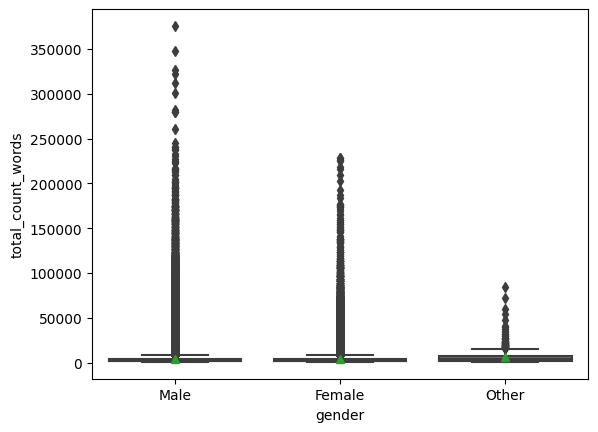

In [40]:
# check concentration & outliers of total word count average calculation

sns.boxplot(data=notable, x="gender", y="total_count_words", showmeans=True)

In [39]:
# some descriptive statistics of total word count

notable.groupby("gender")["total_count_words"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,387906.0,4312.761744,6216.898286,788.0,1605.0,2316.0,4373.0,228762.0
Male,1901904.0,4161.780123,6098.462646,777.0,1566.0,2202.0,4197.0,375867.0
Other,609.0,6729.178982,8294.918938,1171.0,2232.0,3764.0,7641.0,83876.0
